In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from VQLSSVM import VQLSSVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.set_printoptions(precision=4, suppress=True)

In [2]:
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 7
classToFilterOut: int = 2

In [3]:
def prepareDataset(normalizeValues: bool = False, dataset: str = "iris") -> (np.ndarray, np.ndarray, np.array, np.array):
    if dataset == "iris":
        X,y = datasets.load_iris(return_X_y=True)
        X = X[y!=classToFilterOut]
        y = y[y!=classToFilterOut]
    elif dataset == "breastCancer":
        X,y = datasets.load_breast_cancer(return_X_y=True)
    elif dataset == "dummyData":
        X, y = datasets.make_classification(
            n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45
        )
    elif dataset == "digits":
        X, y = datasets.load_digits(n_class=2, return_X_y=True)
    elif dataset == "wine":
        X, y = datasets.load_wine(return_X_y=True) # 3 classes; filter out some class
    else: 
        raise ValueError("Dataset not yet implemented")
    y: np.array = np.where(y == 0, -1, 1) # might cause some problems in a future

    if normalizeValues: # normalize values returns nan with digits dataset
        max = np.max(X, axis=0)
        min = np.min(X, axis=0)
        X = (2*X - min - max) / (max - min)
    return train_test_split(X, y, test_size=(X.shape[0]-subsetSize)/(X.shape[0]), random_state=43)

In [4]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="iris")
print(xTrain)

[[ 0.5556  0.      0.7073  0.6471]
 [-0.1852  0.5833 -0.8537 -0.6471]
 [ 0.7037 -0.25    0.7561  0.4118]
 [-0.4074  0.4167 -0.7561 -0.6471]
 [-0.4815  0.0833 -0.8049 -0.8824]
 [-0.037  -0.25    0.2683  0.4118]
 [ 0.4074 -0.8333  0.7073  0.6471]]


# VQLS-LSSVM state vectors

Condition number of the matrix:  1549.1963269879666
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     101.2276  -1.1254   1.1922  -1.1798  -1.4077   0.4356   1.1453]
 [  1.      -1.1254 101.522   -1.188    1.3826   1.3958  -0.6344  -1.584 ]
 [  1.       1.1922  -1.188  101.2989  -1.229   -1.3315   0.4088   1.2963]
 [  1.      -1.1798   1.3826  -1.229  101.33     1.4104  -0.5584  -1.4667]
 [  1.      -1.4077   1.3958  -1.3315   1.4104 101.6651  -0.5823  -1.4058]
 [  1.       0.4356  -0.6344   0.4088  -0.5584  -0.5823 100.3054   0.6494]
 [  1.       1.1453  -1.584    1.2963  -1.4667  -1.4058   0.6494 101.7794]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.64105774546628+0j), (0.4679490309569777+0j),

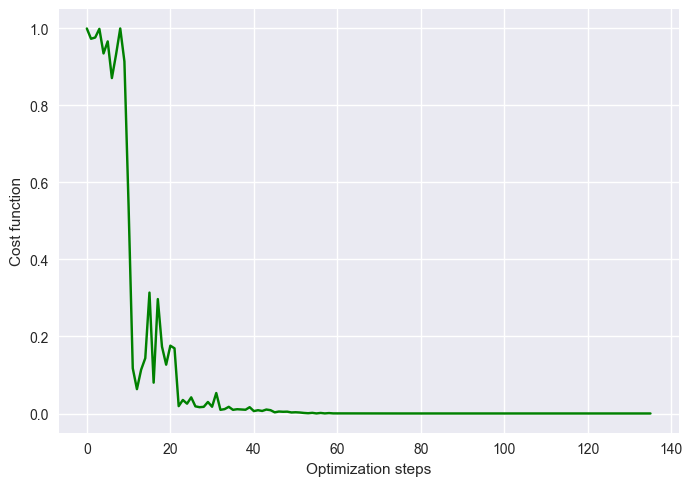

In [5]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")

vqlssvmVectors.plotCost()

In [6]:
costCOBYLA = vqlssvmVectors.getCostHistory()
print("Cost history:")
print(costCOBYLA)

Cost history:
[0.9995748100074308, 0.9728914942143498, 0.9761088976138914, 0.9985946980603938, 0.934826351970828, 0.9660134723545153, 0.8708462685266423, 0.9320689755043807, 0.9996041285643513, 0.9139997181646514, 0.53860499570989, 0.11746515693489978, 0.06330148357524423, 0.11358147680353603, 0.143716739587485, 0.31392905872924926, 0.08012578891531774, 0.2971104528725793, 0.17364158666876917, 0.1268160487602551, 0.1761249208461052, 0.16923965459143475, 0.019159232912940416, 0.0351944181059628, 0.02550331152951124, 0.041965010659292035, 0.01861148807245072, 0.016415321766219848, 0.017346862543194952, 0.0299599859451416, 0.017577936703789154, 0.053259255951473516, 0.009581159601993905, 0.011431101280586775, 0.017379345899293464, 0.009552095993127896, 0.011151353494145422, 0.010395110833603005, 0.009794450429608914, 0.01636914074655138, 0.006286964177305565, 0.00855455367285829, 0.006646068887939616, 0.010341999817782499, 0.008633999769205092, 0.003070133430472577, 0.005145440312849137, 

In [7]:
print(vqlssvmVectors.predict(xTest))

[-0.0724+0.j -0.1282+0.j -0.0065+0.j -0.1225+0.j -0.0624+0.j  0.0818+0.j
 -0.0012+0.j  0.0455+0.j -0.1041+0.j -0.0081+0.j -0.1215+0.j -0.1524+0.j
  0.102 +0.j -0.0911+0.j  0.0055+0.j -0.1675+0.j -0.0393+0.j -0.1254+0.j
  0.0419+0.j  0.0861+0.j -0.0523+0.j -0.1343+0.j  0.0731+0.j  0.0264+0.j
 -0.0999+0.j  0.0206+0.j  0.0681+0.j  0.1176+0.j  0.0799+0.j -0.07  +0.j
 -0.1542+0.j -0.0374+0.j -0.126 +0.j -0.069 +0.j -0.0392+0.j -0.0626+0.j
  0.0666+0.j -0.0929+0.j -0.0948+0.j -0.1157+0.j  0.002 +0.j -0.0791+0.j
 -0.0341+0.j -0.1425+0.j -0.014 +0.j  0.1226+0.j -0.0703+0.j  0.0203+0.j
 -0.0832+0.j -0.0638+0.j -0.0948+0.j  0.1051+0.j  0.0411+0.j  0.0382+0.j
 -0.0862+0.j  0.0951+0.j  0.049 +0.j -0.1188+0.j -0.1144+0.j -0.0729+0.j
 -0.178 +0.j  0.0801+0.j -0.1316+0.j -0.0213+0.j -0.0044+0.j  0.1354+0.j
  0.064 +0.j -0.0977+0.j -0.0913+0.j  0.033 +0.j  0.1384+0.j -0.0686+0.j
  0.0224+0.j -0.0712+0.j  0.0776+0.j -0.0577+0.j -0.1298+0.j  0.1115+0.j
 -0.0751+0.j -0.0909+0.j  0.0188+0.j  0.0495+0.j -0

In [8]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 0.9032258064516129


# VQLS-LSSVM quantum

Condition number of the matrix:  1549.1963269879666
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     101.2276  -1.1254   1.1922  -1.1798  -1.4077   0.4356   1.1453]
 [  1.      -1.1254 101.522   -1.188    1.3826   1.3958  -0.6344  -1.584 ]
 [  1.       1.1922  -1.188  101.2989  -1.229   -1.3315   0.4088   1.2963]
 [  1.      -1.1798   1.3826  -1.229  101.33     1.4104  -0.5584  -1.4667]
 [  1.      -1.4077   1.3958  -1.3315   1.4104 101.6651  -0.5823  -1.4058]
 [  1.       0.4356  -0.6344   0.4088  -0.5584  -0.5823 100.3054   0.6494]
 [  1.       1.1453  -1.584    1.2963  -1.4667  -1.4058   0.6494 101.7794]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.64105774546628+0j), (0.4679490309569777+0j),

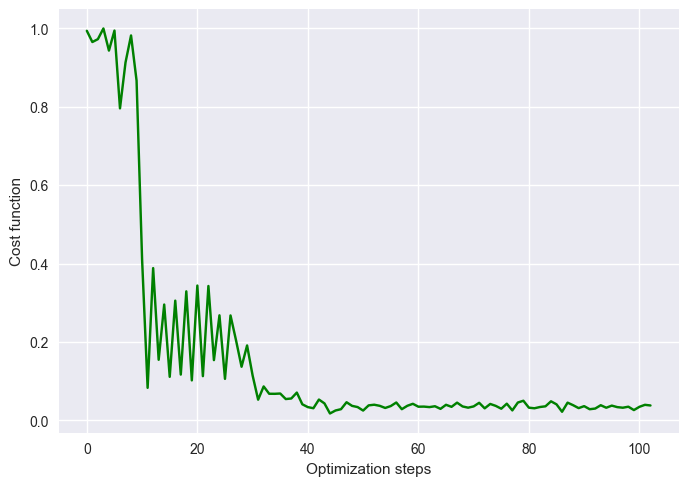

In [9]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvmQuantum.plotCost()

In [14]:
costCOBYLA = vqlssvmQuantum.getCostHistory()
print("Cost history:")
print(costCOBYLA)

import csv

with open('costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


Cost history:
[0.9936535349007992, 0.9650035653671767, 0.9723130210881198, 0.9995624374161449, 0.943188697200751, 0.9941617776275207, 0.795775825400523, 0.9129102645631484, 0.9817260278069746, 0.866544104465397, 0.41022651668582977, 0.08292825598935383, 0.3882910035736835, 0.1544604574692171, 0.29536741470544126, 0.11098866499697035, 0.3053084448748624, 0.11672230366491032, 0.3290210863134043, 0.10191632232429526, 0.34378839470313927, 0.11272026193701101, 0.3426815125154713, 0.15360865817113312, 0.26789429046218904, 0.10581973741734185, 0.2675587354354465, 0.20415452667078626, 0.13673874783823048, 0.19099177892413732, 0.11452174680147231, 0.05266827246025052, 0.08646588851836001, 0.06780034514551303, 0.06767605314214264, 0.0684081860475585, 0.05431719459601081, 0.05571571837080269, 0.07080869200838524, 0.04089844359547701, 0.03371672262701497, 0.03088472268949427, 0.05303815355469865, 0.04325134396906993, 0.017526342052096466, 0.025114787415319584, 0.0284888691482188, 0.046171590948421

In [15]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [-0.0748+0.j -0.0951+0.j -0.0937+0.j -0.1151+0.j -0.0034+0.j  0.0482+0.j
  0.0267+0.j  0.0386+0.j -0.0923+0.j  0.0155+0.j -0.0861+0.j -0.0971+0.j
  0.0381+0.j -0.0914+0.j  0.0321+0.j -0.1067+0.j -0.0832+0.j -0.0822+0.j
  0.0239+0.j  0.0701+0.j -0.0841+0.j -0.0878+0.j  0.0495+0.j  0.0329+0.j
 -0.1024+0.j  0.034 +0.j  0.0447+0.j  0.0527+0.j  0.053 +0.j -0.096 +0.j
 -0.0923+0.j -0.1011+0.j -0.0818+0.j -0.095 +0.j -0.0916+0.j  0.002 +0.j
  0.0499+0.j -0.0865+0.j -0.0863+0.j -0.0985+0.j  0.0447+0.j -0.0708+0.j
 -0.0755+0.j -0.1029+0.j  0.025 +0.j  0.0658+0.j -0.0728+0.j  0.0272+0.j
 -0.0868+0.j -0.0874+0.j -0.093 +0.j  0.0532+0.j  0.0298+0.j  0.0223+0.j
 -0.0812+0.j  0.0672+0.j  0.039 +0.j -0.0892+0.j -0.0757+0.j -0.0781+0.j
 -0.0715+0.j  0.0766+0.j -0.0909+0.j  0.02  +0.j  0.0378+0.j  0.0806+0.j
  0.038 +0.j -0.0891+0.j -0.0859+0.j  0.0307+0.j  0.0749+0.j -0.09  +0.j
  0.0291+0.j  0.0146+0.j  0.0499+0.j -0.107 +0.j -0.0957+0.j  0.076 +0.j
 -0.083 +0.j -0.0968+0.j  0.0342+0.j 

# LSSVM (work in progresss)

In [12]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [16]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 1.0
